In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
df = pd.read_excel(r"C:\Users\aryan\OneDrive\Desktop\Studi Idependen MSIB 6\Data Project\Orders Detail.xlsx")
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time
0,1,1,hawaiian_m,hawaiian,Classic,M,13.25,1,13.25,2015-01-01,11:38:36
1,2,2,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-01-01,11:38:36
2,3,2,five_cheese_l,five_cheese,Veggie,L,18.50,1,18.50,2015-01-01,11:57:40
3,4,2,ital_supr_l,ital_supr,Supreme,L,20.75,1,20.75,2015-01-01,11:57:40
4,5,2,mexicana_m,mexicana,Veggie,M,16.00,1,16.00,2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,ckn_alfredo,Chicken,M,16.75,1,16.75,2015-12-31,21:14:37
48616,48617,21348,four_cheese_l,four_cheese,Veggie,L,17.95,1,17.95,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,mexicana,Veggie,L,20.25,1,20.25,2015-12-31,21:23:10


In [26]:
sample = df.sample(
    n=None,
    frac=0.10,
    replace=False,
    weights=None,
    random_state=None,
    axis=0,
    ignore_index=False
)
print(sample)

       order_details_id  order_id       pizza_id pizza_type_id category size  \
20301             20302      8917  classic_dlx_m   classic_dlx  Classic    M   
4148               4149      1843     big_meat_s      big_meat  Classic    S   
47104             47105     20704   napolitana_s    napolitana  Classic    S   
11316             11317      4970   spicy_ital_l    spicy_ital  Supreme    L   
28067             28068     12356  spinach_fet_l   spinach_fet   Veggie    L   
...                 ...       ...            ...           ...      ...  ...   
30155             30156     13322      bbq_ckn_s       bbq_ckn  Chicken    S   
39092             39093     17228   veggie_veg_m    veggie_veg   Veggie    M   
42725             42726     18795     sicilian_m      sicilian  Supreme    M   
23595             23596     10377     cali_ckn_m      cali_ckn  Chicken    M   
35762             35763     15790     hawaiian_s      hawaiian  Classic    S   

       price  quantity  amount       da

In [29]:
# Load data ke dalam DataFrame
df = pd.DataFrame(sample)
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time
20301,20302,8917,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-05-30,12:23:52
4148,4149,1843,big_meat_s,big_meat,Classic,S,12.00,1,12.00,2015-01-31,21:07:17
47104,47105,20704,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-18,12:35:06
11316,11317,4970,spicy_ital_l,spicy_ital,Supreme,L,20.75,1,20.75,2015-03-25,17:32:07
28067,28068,12356,spinach_fet_l,spinach_fet,Veggie,L,20.25,1,20.25,2015-07-25,19:01:31
...,...,...,...,...,...,...,...,...,...,...,...
30155,30156,13322,bbq_ckn_s,bbq_ckn,Chicken,S,12.75,1,12.75,2015-08-10,18:35:54
39092,39093,17228,veggie_veg_m,veggie_veg,Veggie,M,16.00,1,16.00,2015-10-20,13:03:30
42725,42726,18795,sicilian_m,sicilian,Supreme,M,16.25,1,16.25,2015-11-17,11:47:53
23595,23596,10377,cali_ckn_m,cali_ckn,Chicken,M,16.75,1,16.75,2015-06-23,19:18:41


In [30]:
# Mengubah kategori menjadi numerik
category_dict = {'Classic': 0, 'Veggie': 1, 'Supreme': 2, 'Chicken': 3}
df['category'] = df['category'].map(category_dict)

In [31]:
# Mengubah size menjadi numerik
size_dict = {'S': 0, 'M': 1, 'L': 2, 'XL': 3, 'XXL': 4}
df['size'] = df['size'].map(size_dict)


In [32]:
# Mengambil fitur yang relevan untuk clustering
features = df[['price', 'quantity', 'amount', 'category', 'size']]

In [35]:
# Standarisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.1278061 , -0.13813965, -0.17818608, -1.21797939, -0.13115947],
       [-1.24151392, -0.13813965, -1.09757558, -1.21797939, -1.32089327],
       [-1.24151392, -0.13813965, -1.09757558, -1.21797939, -1.32089327],
       ...,
       [-0.05819937, -0.13813965, -0.12072424,  0.53351892, -0.13115947],
       [ 0.08101411, -0.13813965, -0.00580055,  1.40926808, -0.13115947],
       [-1.65915436, -0.13813965, -1.44234665, -1.21797939, -1.32089327]])

In [37]:
similarity_matrix = cosine_similarity(features_scaled)
similarity_matrix

array([[ 1.        ,  0.66224801,  0.66224801, ..., -0.80198023,
        -0.94726846,  0.60260011],
       [ 0.66224801,  1.        ,  1.        , ..., -0.17733137,
        -0.46409147,  0.99010855],
       [ 0.66224801,  1.        ,  1.        , ..., -0.17733137,
        -0.46409147,  0.99010855],
       ...,
       [-0.80198023, -0.17733137, -0.17733137, ...,  1.        ,
         0.94565639, -0.11288139],
       [-0.94726846, -0.46409147, -0.46409147, ...,  0.94565639,
         1.        , -0.40754918],
       [ 0.60260011,  0.99010855,  0.99010855, ..., -0.11288139,
        -0.40754918,  1.        ]])

In [38]:
# Menentukan jumlah cluster dengan Elbow Method
sse = []
max_clusters = min(len(df), 10)  # Menghindari jumlah cluster melebihi jumlah sampel
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

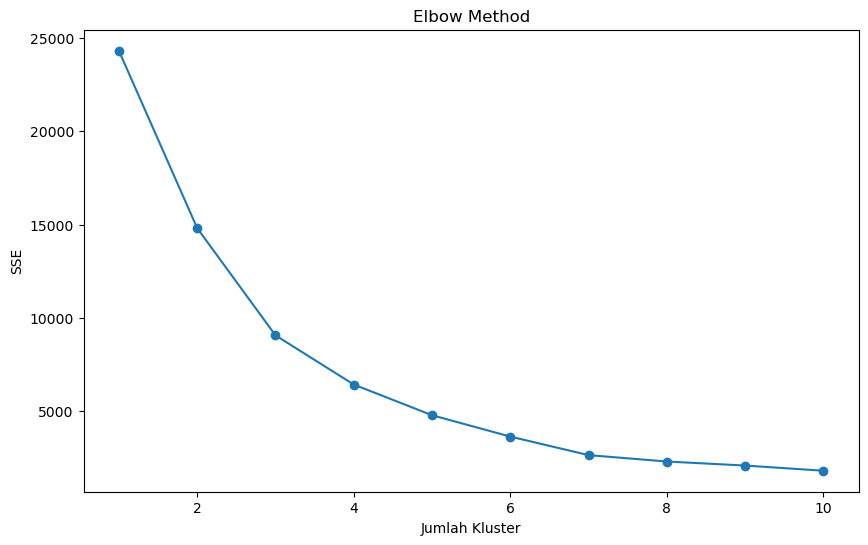

In [39]:
# Plot SSE untuk melihat "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [59]:
# Menentukan jumlah cluster optimal
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

In [60]:
# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
cluster_labels = kmeans.fit_predict(features_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
# Menghitung Silhouette Score
sil_score = silhouette_score(features_scaled, df['cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.42


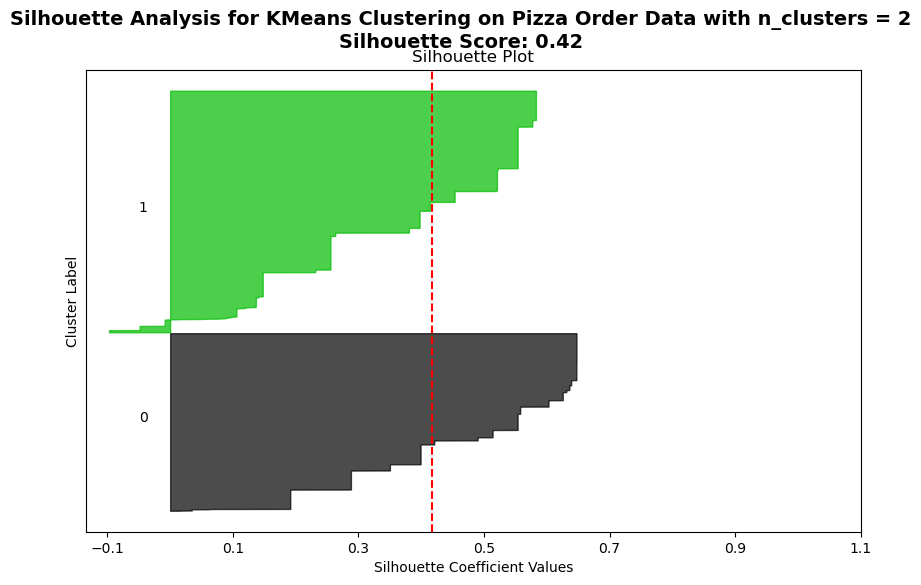

In [46]:
# Menghitung nilai silhouette untuk setiap sampel
sample_silhouette_values = silhouette_samples(features_scaled, cluster_labels)

# Membuat plot Silhouette Plot
plt.figure(figsize=(10, 6))

y_lower = 10
for i in range(2):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 2)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=sil_score, color="red", linestyle="--")
plt.yticks([])
plt.xticks(np.arange(-0.1, 1.1, 0.2))

plt.suptitle((f"Silhouette Analysis for KMeans Clustering on Pizza Order Data "
              f"with n_clusters = 2\nSilhouette Score: {sil_score:.2f}"),
             fontsize=14, fontweight='bold')

plt.show()